### Import modules




In [14]:
%matplotlib inline 

# open matplotlib plots inline

import numpy as np
import pandas as pd 
import scipy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

## VIDEO 1

### Read in the data


In [2]:
NBA = pd.read_csv("NBA_train.csv")
print(NBA.head())
print(NBA.dtypes)
print(NBA.describe())
print(NBA.shape)

   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   3P  3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV  
0  3248  6952   13   75  2038  2645  1369  2406  1913  782  539  1495  
1  3455  6965  162  422  1907  2449  1227  2457  2198  809  308  1539  
2  3292  6668   70  275  2019  2592  1115  2465  2152  704  392  1684  
3  3775  7854   36  187  1702  2205  1307  2381  2108  764  342  1370  
4  3379  7215   83  255  1871  2539  1311  2524  2079  746  404  1533  

[5 rows x 20 columns]
SeasonEnd     int64
Team         object
Playoffs      int64
W             int64
PT

## VIDEO 2

### How many wins to make the playoffs?


In [3]:
tab = NBA.groupby(['W', 'Playoffs']).size()
tab.unstack()

Playoffs,0,1
W,,
11,2,NaN
12,2,NaN
13,2,NaN
14,2,NaN
15,10,NaN
16,2,NaN
17,11,NaN
18,5,NaN
19,10,NaN


### Compute Points Difference


In [4]:
NBA['PTSdiff'] = NBA.PTS - NBA.oppPTS
print(NBA.head())

   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   3P  3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV      
0  3248  6952   13   75  2038  2645  1369  2406  1913  782  539  1495 ...  
1  3455  6965  162  422  1907  2449  1227  2457  2198  809  308  1539 ...  
2  3292  6668   70  275  2019  2592  1115  2465  2152  704  392  1684 ...  
3  3775  7854   36  187  1702  2205  1307  2381  2108  764  342  1370 ...  
4  3379  7215   83  255  1871  2539  1311  2524  2079  746  404  1533 ...  

[5 rows x 21 columns]


### Check for linear relationship

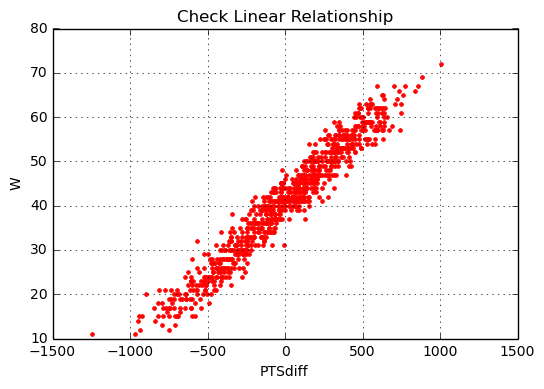

In [5]:
plt.figure()
plt.title('Check Linear Relationship')
plt.xlabel('PTSdiff')
plt.ylabel('W')
plt.plot(NBA.PTSdiff, NBA.W, 'r.')
plt.grid(True)
plt.show()

### Linear regression model for wins


In [6]:
feature_cols = ['PTSdiff']
X = NBA[feature_cols]
y = NBA.W
WinsReg = LinearRegression()
WinsReg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print WinsReg.intercept_
print WinsReg.coef_

# Sum of Squared Errors
print(WinsReg.score(X,y))

41.0
[ 0.03258633]
0.94234248197


## VIDEO 3

### Linear regression model for points scored

In [7]:
feature_cols = ['2PA', '3PA', 'FTA', 'AST', 'ORB', 'DRB', 'TOV', 'STL', 'BLK']
X = NBA[feature_cols]
y = NBA.PTS
PointsReg = LinearRegression()
PointsReg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print PointsReg.intercept_
print PointsReg.coef_

# R-squared or Sum of Squared Errors
print(PointsReg.score(X,y))

-2050.81081277
[ 1.04287845  1.25859058  1.12801702  0.88576709 -0.95538673  0.03882744
 -0.0247526  -0.19917749 -0.05576374]
0.899155295593


In [53]:
predictions = PointsReg.predict(X)
#for i, prediction in enumerate(predictions):
#    print 'Predicted: %s, Target: %s' % (prediction, y[i])

SSE = sum((PointsReg.predict(X) - y) ** 2)
SStot = sum((y - np.mean(y)) ** 2)
MSE = np.mean((PointsReg.predict(X) - y) ** 2)
RMSE = math.sqrt(MSE)
R2 = (1 - SSE/SStot)
R2score = PointsReg.score(X, y)

print("Sum of Squared Residual or Sum of Squared Errord (SSE): %f" % SSE)
print("SStot: %f" % SStot)
print("Mean Squared Errord (MSE): %f" % MSE)
print("Root Mean Squared Errord (RMSE): %f" % RMSE)
print ('R2 value measured manually: %f' % R2)
print ('Variance score or R-squared value measured by formula: %f' % R2score)

Sum of Squared Residual or Sum of Squared Errord (SSE): 28394313.994757
SStot: 281564750.095808
Mean Squared Errord (MSE): 34005.166461
Root Mean Squared Errord (RMSE): 184.404898
R2 value measured manually: 0.899155
Variance score or R-squared value measured by formula: 0.899155


### Average number of points in a season


In [54]:
np.mean(NBA.PTS)

8370.2395209580845